### Carga de librerías

In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Carga de conjunto de datos

In [4]:
#Carga el conjunto de datos en formato CSV al entorno de Python.
creditdefaultraw = pd.read_csv("default of credit card clients updated.csv")

### Configuración inicial de conjunto de datos

Se eliminó la columna "ID" ya que no se considera necesaria en función del alcance de este análisis. Además, se cambió el nombre de la variable dependiente de "default payment next month" a "DEFAULT_PAYMENT".

In [5]:
#Despliega las primeras cinco observaciones de un conjunto de datos.
creditdefaultraw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Reducción dimensional del conjunto de datos

In [6]:
#Remueve la columna ID ya que no es necesaria para efectos del presente análisis. 
creditdefaultraw = creditdefaultraw.drop("ID",axis=1)

In [41]:
#Unifica las categoría de educación redundantes bajo la categoría 4. 
creditdefaultraw["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)

In [42]:
#Cambia el nombre de la variable dependiente bajo análisis.
creditdefaultraw = creditdefaultraw.rename(columns={'default payment next month':'DEFAULT_PAYMENT'})

### Exploración de estructura del conjunto de datos

No se encontraron observaciones faltantes en el conjunto de datos. Además, se determinó que todos los atributos fueron declaradados como enteros a pesar que algunos corresponden a variables categóricas.

In [43]:
#Esta función despliega un resumen estadístico similar al generado por summary en R.
creditdefaultraw.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [44]:
#Acumula por atributo la cantidad de veces que aparece NaNs (not a number).
creditdefaultraw.isna().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
DEFAULT_PAYMENT    0
dtype: int64

In [45]:
#Función alternativa y resumida para determinar tipos de datos en atributos.
creditdefaultraw.dtypes

LIMIT_BAL             int64
SEX                category
EDUCATION          category
MARRIAGE           category
AGE                   int64
PAY_0              category
PAY_2              category
PAY_3              category
PAY_4              category
PAY_5              category
PAY_6              category
BILL_AMT1             int64
BILL_AMT2             int64
BILL_AMT3             int64
BILL_AMT4             int64
BILL_AMT5             int64
BILL_AMT6             int64
PAY_AMT1              int64
PAY_AMT2              int64
PAY_AMT3              int64
PAY_AMT4              int64
PAY_AMT5              int64
PAY_AMT6              int64
DEFAULT_PAYMENT    category
dtype: object

### Cambio de tipo de variable en atributos aplicables

In [46]:
#Crea un nuevo conjunto de datos para aplicar el cambio de tipo de variable
creditdefault = creditdefaultraw

In [47]:
#Cambia el tipo de variable de los atributos de interés.
creditdefault['SEX'] = creditdefault['SEX'].astype('category')
creditdefault['EDUCATION'] = creditdefault['EDUCATION'].astype('category')
creditdefault['MARRIAGE'] = creditdefault['MARRIAGE'].astype('category')
creditdefault['PAY_0'] = creditdefault['PAY_0'].astype('category')
creditdefault['PAY_2'] = creditdefault['PAY_2'].astype('category')
creditdefault['PAY_3'] = creditdefault['PAY_3'].astype('category')
creditdefault['PAY_4'] = creditdefault['PAY_4'].astype('category')
creditdefault['PAY_5'] = creditdefault['PAY_5'].astype('category')
creditdefault['PAY_6'] = creditdefault['PAY_6'].astype('category')
creditdefault['DEFAULT_PAYMENT'] = creditdefault['DEFAULT_PAYMENT'].astype('category')

In [48]:
#Función alternativa y resumida para determinar tipos de datos en atributos.
creditdefault.dtypes

LIMIT_BAL             int64
SEX                category
EDUCATION          category
MARRIAGE           category
AGE                   int64
PAY_0              category
PAY_2              category
PAY_3              category
PAY_4              category
PAY_5              category
PAY_6              category
BILL_AMT1             int64
BILL_AMT2             int64
BILL_AMT3             int64
BILL_AMT4             int64
BILL_AMT5             int64
BILL_AMT6             int64
PAY_AMT1              int64
PAY_AMT2              int64
PAY_AMT3              int64
PAY_AMT4              int64
PAY_AMT5              int64
PAY_AMT6              int64
DEFAULT_PAYMENT    category
dtype: object


### Exploración inicial de los perfiles de Credit One

Los **clientes de Credit One son en su mayoría mujeres** superando en un 45% el total de hombres de los perfiles analizados.

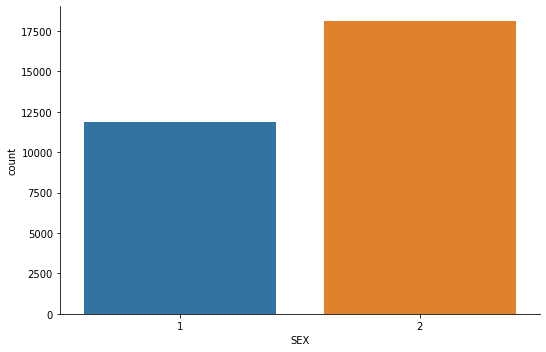

In [49]:
# Despliega un histograma del género de cada perfil.
fig01 = sns.factorplot('SEX', data = creditdefault, kind = "count", aspect = 1.5)

In [50]:
#Realiza un conteo por categoría.
creditdefault.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

Los perfiles de Credit One en su **mayoría cuenta con estudios universitarios y secundaria**.

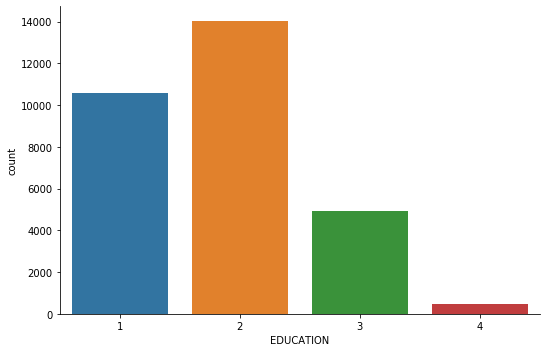

In [29]:
# Despliega un histograma del nivel educativo de cada perfil.
fig02 = sns.factorplot('EDUCATION', data = creditdefault, kind = "count", aspect = 1.5)

In [51]:
#Realiza un conteo por categoría.
creditdefault.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

Los perfiles Credit One corresponden en su **mayoría a personas casadas o solteras** siendo minoría los perfiles divorciados y en algún otro estado civil.

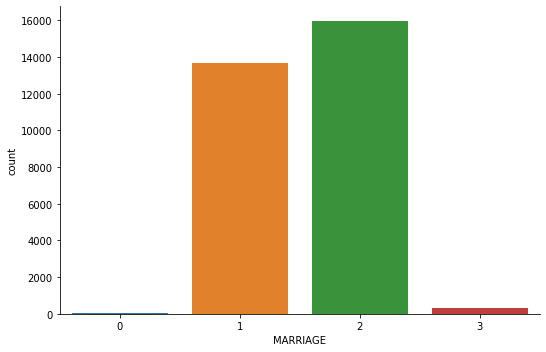

In [52]:
# Despliega un histograma del nivel educativo de cada perfil.
fig03 = sns.factorplot('MARRIAGE', data = creditdefault, kind = "count", aspect = 1.5)

La mayor parte de los **perfiles se encuentran en un rango de edad de los 22 a 45 años**.

In [53]:
#Realiza un conteo por categoría.
creditdefault.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

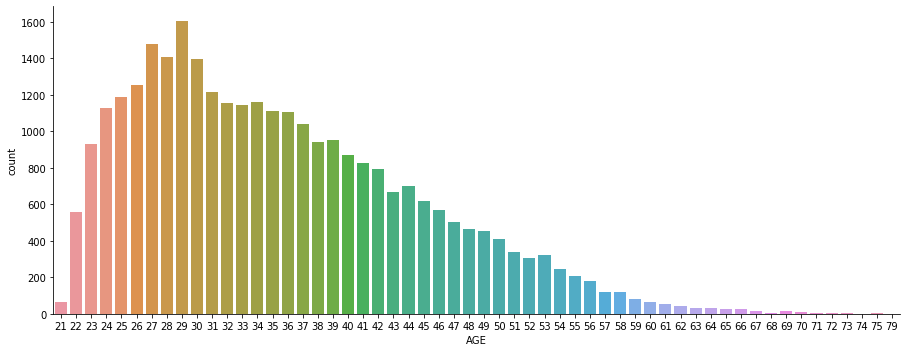

In [33]:
# Despliega un histograma de la edad de cada perfil.
fig04 = sns.factorplot('AGE', data = creditdefault, kind = "count", aspect = 2.5)

In [34]:
#Realiza un conteo por categoría.
creditdefault.groupby('AGE')['AGE'].count()

AGE
21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

Se observa a grandes rasgos que los **perfiles con menos probabibildad de incurrir en morosidad son los que no consumen crédito o pagan el monto completo**.

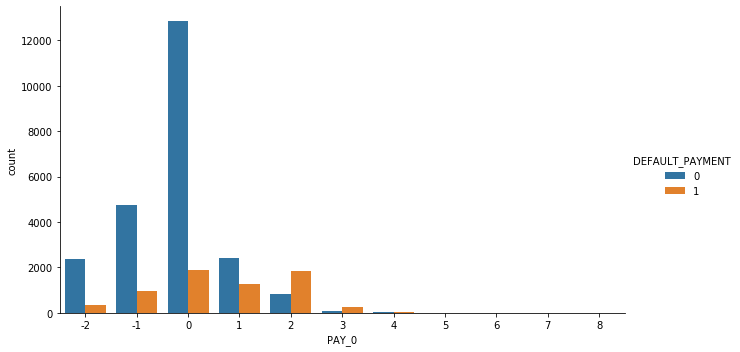

In [35]:
fig04 = sns.factorplot('PAY_0', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

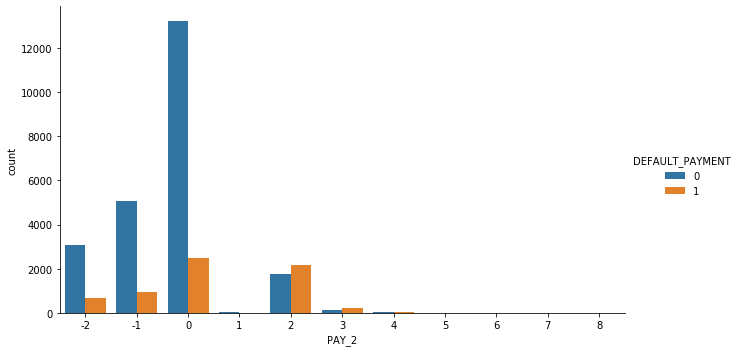

In [36]:
fig05 = sns.factorplot('PAY_2', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

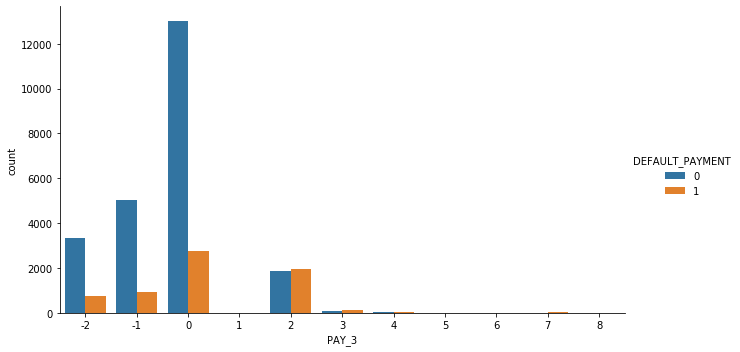

In [37]:
fig06 = sns.factorplot('PAY_3', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

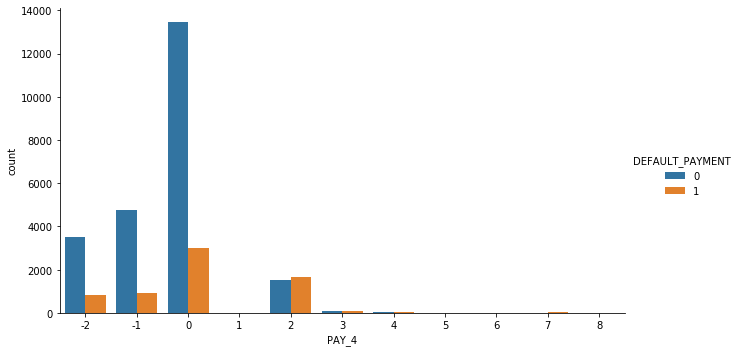

In [38]:
fig07 = sns.factorplot('PAY_4', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

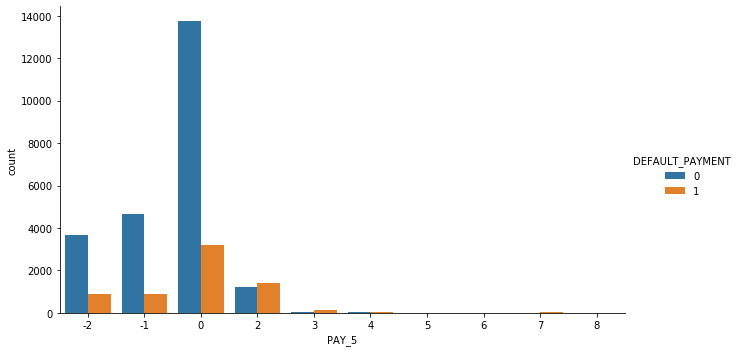

In [39]:
fig08 = sns.factorplot('PAY_5', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

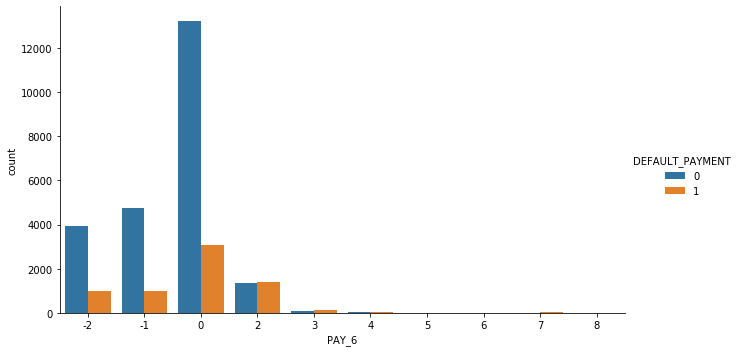

In [40]:
fig09 = sns.factorplot('PAY_6', data=creditdefault, hue='DEFAULT_PAYMENT', kind='count', aspect=1.75)

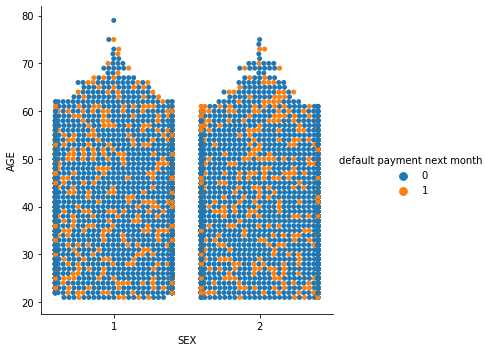

In [11]:
sns.catplot(x="SEX",
            y="AGE",
            hue="DEFAULT_PAYMENT",
            kind="swarm",
            data=creditdefault)

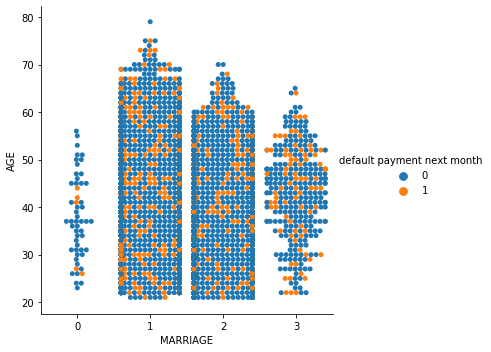

In [12]:
sns.catplot(x="MARRIAGE",
            y="AGE",
            hue="DEFAULT_PAYMENT",
            kind="swarm",
            data=creditdefault)

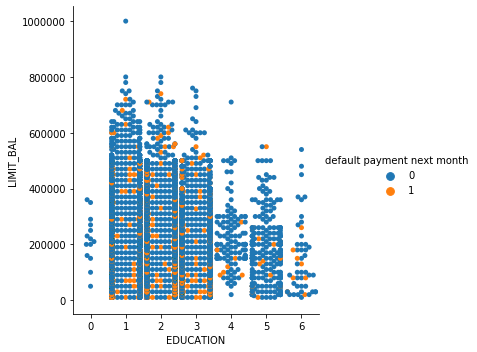

In [13]:
sns.catplot(x="EDUCATION",
            y="LIMIT_BAL",
            hue="DEFAULT_PAYMENT",
            kind="swarm",
            data=creditdefault)

### Análisis de correlación y covarianza

In [54]:
corrMat = creditdefault.corr()
print(corrMat)

           LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
LIMIT_BAL   1.000000  0.144713   0.285430   0.278314   0.283236   0.293988   
AGE         0.144713  1.000000   0.056239   0.054283   0.053710   0.051353   
BILL_AMT1   0.285430  0.056239   1.000000   0.951484   0.892279   0.860272   
BILL_AMT2   0.278314  0.054283   0.951484   1.000000   0.928326   0.892482   
BILL_AMT3   0.283236  0.053710   0.892279   0.928326   1.000000   0.923969   
BILL_AMT4   0.293988  0.051353   0.860272   0.892482   0.923969   1.000000   
BILL_AMT5   0.295562  0.049345   0.829779   0.859778   0.883910   0.940134   
BILL_AMT6   0.290389  0.047613   0.802650   0.831594   0.853320   0.900941   
PAY_AMT1    0.195236  0.026147   0.140277   0.280365   0.244335   0.233012   
PAY_AMT2    0.178408  0.021785   0.099355   0.100851   0.316936   0.207564   
PAY_AMT3    0.210167  0.029247   0.156887   0.150718   0.130011   0.300023   
PAY_AMT4    0.203242  0.021379   0.158303   0.147398   0.143405 

In [98]:
covMat = creditdefault.cov()
print(covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

### Almacenamiento de conjunto de datos en CSV

In [58]:
creditdefault.to_csv(r'P:\Google Drive\Certificaciones y Cursos\CENFOTEC Data Analytics\Modulo 05\Code Notebook\creditdefault.csv',index = False)